In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_excel('MERGED DATASET.xlsx')


In [3]:
df.head()

,Date,Cargo Traffic,Container Traffic,CPI,Exchange Rate(USD),Inflation,M2,Vessel Traffic
0,2024M12,2403418.0,151051.50,248.3,14.7805,23.8,247761960000,142
1,2024M11,2284761.0,157147.00,243.9,15.9834,21.5,244128780000,149
2,2024M10,2204795.0,150726.00,237.8,15.9889,22.1,238258110000,142
3,2024M09,1971894.0,156101.25,235.8,15.5575,21.5,229253490000,136
4,2024M08,2088359.0,150036.75,229.4,15.1037,20.4,214821110000,139


In [4]:
df.columns = df.columns.str.strip()


In [5]:

df["Date"] = df["Date"].astype(str).str.replace("M", "-", regex=False)
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m")


In [6]:
df = df.sort_values("Date").reset_index(drop=True)


In [7]:
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                120 non-null    datetime64[ns]
 1   Cargo Traffic       120 non-null    float64       
 2   Container Traffic   120 non-null    float64       
 3   CPI                 120 non-null    float64       
 4   Exchange Rate(USD)  120 non-null    float64       
 5   Inflation           120 non-null    float64       
 6   M2                  120 non-null    int64         
 7   Vessel Traffic      120 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 7.6 KB


,Date,Cargo Traffic,Container Traffic,CPI,Exchange Rate(USD),Inflation,M2,Vessel Traffic
0,2015-01-01,1057143.0,68390.0,50.7,3.22,16.44,27522260000,121
1,2015-02-01,974065.0,60197.0,51.3,3.36,16.50,27600060000,113
2,2015-03-01,1010819.0,65315.0,51.9,3.59,16.64,27519420000,102
3,2015-04-01,1030694.0,56885.0,52.8,3.81,16.76,28076970000,96
4,2015-05-01,1147705.0,69903.0,53.3,3.89,16.91,28275540000,119


#### EDA

In [8]:
df.describe()


,Date,Cargo Traffic,Container Traffic,CPI,Exchange Rate(USD),Inflation,M2,Vessel Traffic
count,120,1.200000e+02,1.200000e+02,120.000000,120.000000,120.000000,1.200000e+02,120.000000
mean,2019-12-16 10:48:00,1.480316e+06,1.033304e+05,108.185833,6.665217,17.995667,8.865886e+10,117.016667
min,2015-01-01 00:00:00,9.224190e+05,5.688500e+04,50.700000,3.220000,7.500000,2.713877e+10,93.000000
25%,2017-06-23 12:00:00,1.206333e+06,7.634481e+04,72.300000,4.377500,9.952500,4.553513e+10,104.000000
50%,2019-12-16 12:00:00,1.445024e+06,8.841412e+04,85.500000,5.372650,13.600000,6.924298e+10,113.500000
75%,2022-06-08 12:00:00,1.722446e+06,1.193431e+05,130.425000,7.240800,21.500000,1.084994e+11,127.000000
max,2024-12-01 00:00:00,2.403418e+06,1.007065e+06,248.300000,15.988900,54.100000,2.477620e+11,155.000000
std,NaN,3.443239e+05,8.691234e+04,53.993092,3.395180,11.216914,5.591266e+10,15.712214


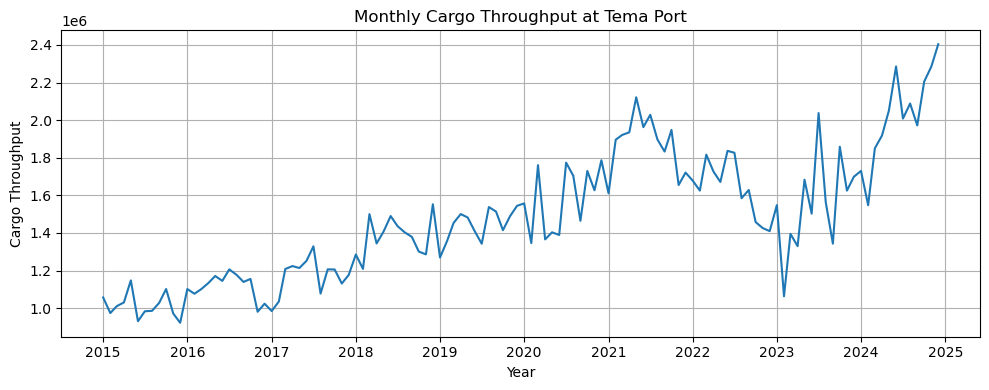

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10,4))
plt.plot(df["Date"], df["Cargo Traffic"])

plt.title("Monthly Cargo Throughput at Tema Port")
plt.xlabel("Year")
plt.ylabel("Cargo Throughput")


plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.grid(True)
plt.tight_layout()
plt.show()


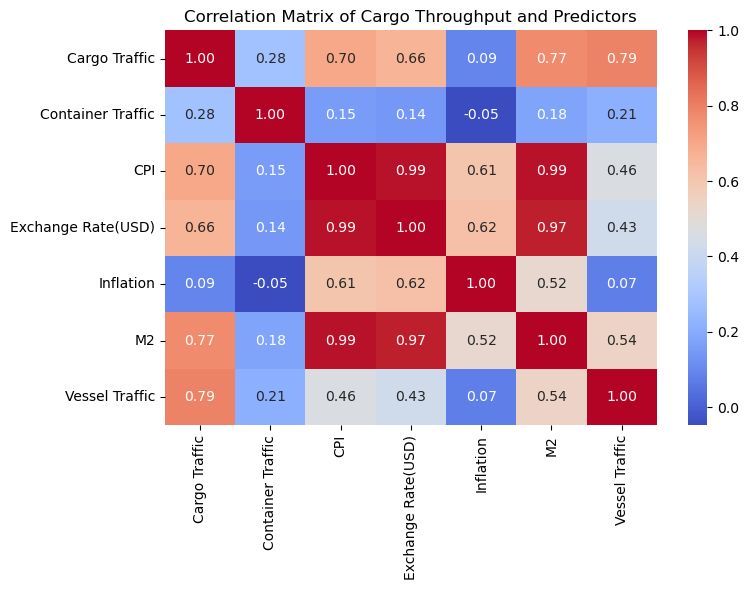

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.drop(columns=["Date"]).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Cargo Throughput and Predictors")
plt.tight_layout()
plt.show()


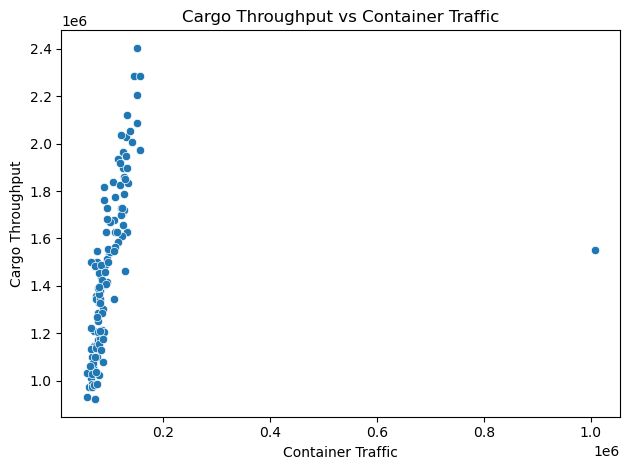

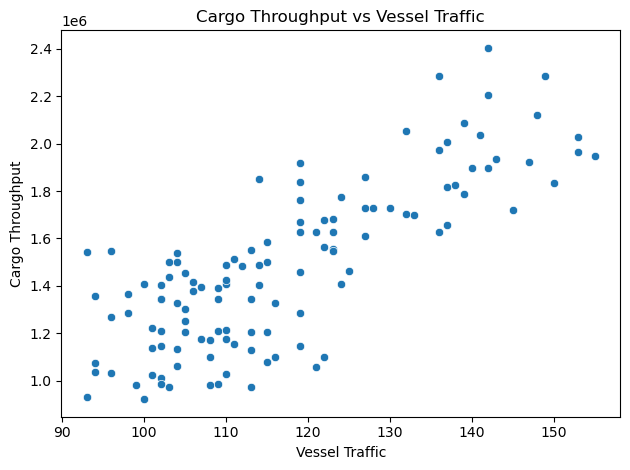

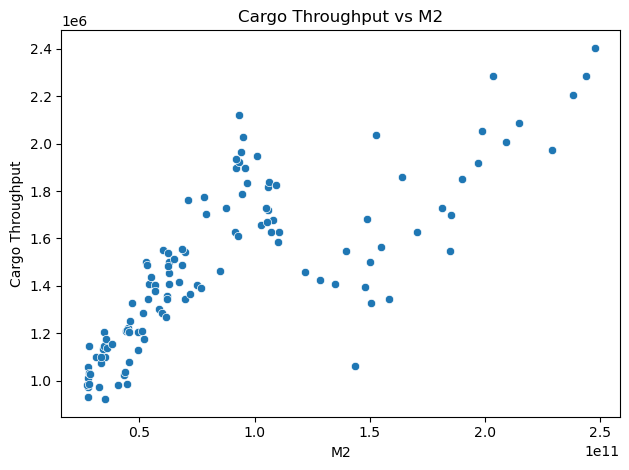

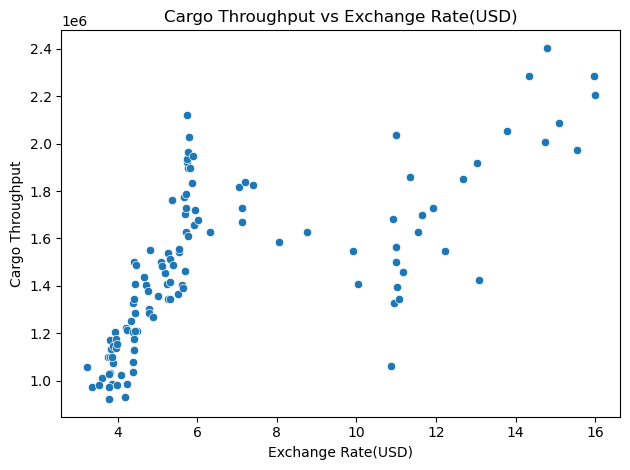

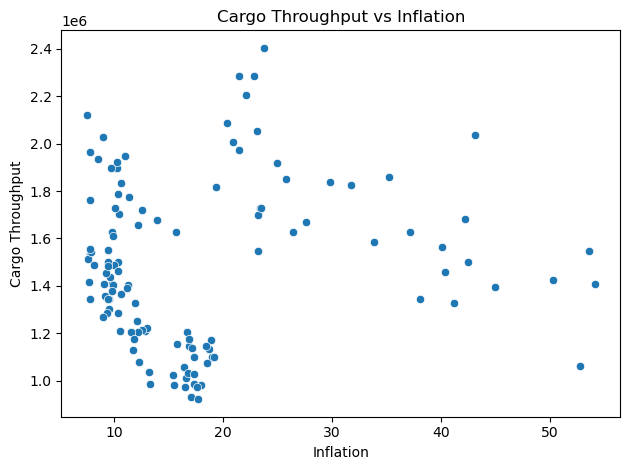

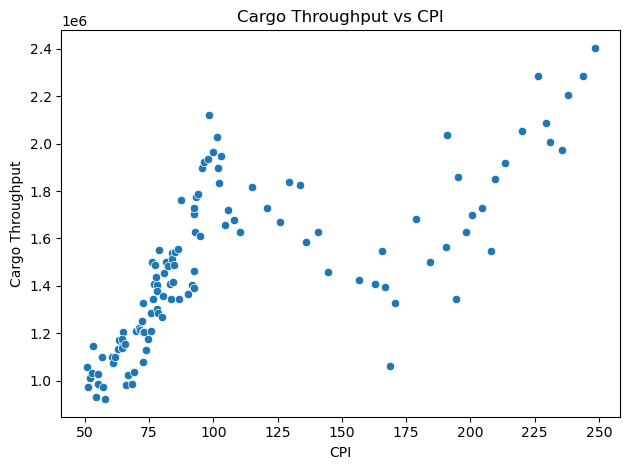

In [11]:
predictors = [
    "Container Traffic",
    "Vessel Traffic",
    "M2",
    "Exchange Rate(USD)",
    "Inflation",
    "CPI"
]

for var in predictors:
    sns.scatterplot(x=df[var], y=df["Cargo Traffic"])
    plt.title(f"Cargo Throughput vs {var}")
    plt.xlabel(var)
    plt.ylabel("Cargo Throughput")
    plt.tight_layout()
    plt.show()


#### Stationarity Test

In [12]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df["Cargo Traffic"])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

from statsmodels.tsa.stattools import kpss

kpss_result = kpss(df["Cargo Traffic"], regression="c", nlags="auto")

print("KPSS Statistic:", kpss_result[0])
print("p-value:", kpss_result[1])


ADF Statistic: -0.47917192801058267
p-value: 0.8960172699203424
KPSS Statistic: 1.4679318757792592
p-value: 0.01


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18772\241236438.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df["Cargo Traffic"], regression="c", nlags="auto")


#### Model Building

In [13]:
df.columns

Index(['Date', 'Cargo Traffic', 'Container Traffic', 'CPI',
       'Exchange Rate(USD)', 'Inflation', 'M2', 'Vessel Traffic'],
      dtype='object')

In [14]:
y = df["Cargo Traffic"]
X = df[
    [
        "Container Traffic",
        "Vessel Traffic",
        "CPI",
        "Inflation",
        "M2",
        "Exchange Rate(USD)"
    ]
]



In [15]:
for lag in [1, 3, 6]:
    X[f"Container_lag{lag}"] = df["Container Traffic"].shift(lag)
    X[f"Vessel_lag{lag}"] = df["Vessel Traffic"].shift(lag)
    X[f"M2_lag{lag}"] = df["M2"].shift(lag)
    X[f"Inflation_lag{lag}"] = df["Inflation"].shift(lag)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18772\3411597594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f"Container_lag{lag}"] = df["Container Traffic"].shift(lag)


In [16]:
X = X.dropna()
y = y.loc[X.index]


In [17]:
split = int(len(X) * 0.8)

X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression MAE:", mae)
print("Linear Regression RMSE:", rmse)


Linear Regression MAE: 726008.1041618882
Linear Regression RMSE: 741153.3722515993


In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)


In [22]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=42
)

xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)



In [24]:
def evaluate(y_true, y_pred, name):
    print(name)
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAPE (%):",np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
    print("-" * 30)

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_xgb, "XGBoost")
evaluate(y_test,y_pred_gbr, "GBR")

Linear Regression
MAE: 726008.1041618882
RMSE: 741153.3722515993
MAPE (%): 41.86721542631035
------------------------------
Random Forest
MAE: 249213.96688571468
RMSE: 303632.84823895653
MAPE (%): 13.273856214843201
------------------------------
XGBoost
MAE: 317677.67391304346
RMSE: 377247.17522513506
MAPE (%): 16.78394836573059
------------------------------
GBR
MAE: 296679.3483972103
RMSE: 354855.21857347013
MAPE (%): 15.57830239369988
------------------------------


In [27]:
df["Cargo_lag1"] = df["Cargo Traffic"].shift(1)
df["Cargo_lag3"] = df["Cargo Traffic"].shift(3)
df["Cargo_lag6"] = df["Cargo Traffic"].shift(6)


In [28]:
import numpy as np

df["log_Cargo"] = np.log(df["Cargo Traffic"])


In [29]:
X = df[
    [
        "Container Traffic",
        "Vessel Traffic",
        "CPI",
        "Inflation",
        "M2",
        "Exchange Rate(USD)",
        "Cargo_lag1",
        "Cargo_lag3",
        "Cargo_lag6"
    ]
]


In [30]:
y = df["Cargo Traffic"]

X = X.dropna()
y = y.loc[X.index]


In [31]:
split = int(len(X) * 0.8)

X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]


In [32]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
lrlag = LinearRegression()
lrlag.fit(X_train_scaled, y_train)

y_pred_lrlag = lrlag.predict(X_test_scaled)

In [34]:
from sklearn.ensemble import RandomForestRegressor

rflag = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

rflag.fit(X_train_scaled, y_train)
y_pred_rflag = rflag.predict(X_test_scaled)


In [35]:
from xgboost import XGBRegressor

xgblag = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=42
)

xgblag.fit(X_train_scaled, y_train)
y_pred_xgblag = xgblag.predict(X_test_scaled)

In [36]:
gbrlag = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbrlag.fit(X_train_scaled, y_train)
y_pred_gbrlag = gbrlag.predict(X_test_scaled)


In [39]:
def evaluate(y_true, y_pred, name):
    print(name)
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAPE (%):",np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
    print("-" * 30)

evaluate(y_test, y_pred_lrlag, "Linear Regression")
evaluate(y_test, y_pred_rflag, "Random Forest")
evaluate(y_test, y_pred_xgblag, "XGBoost")
evaluate(y_test,y_pred_gbrlag, "GBR")

Linear Regression
MAE: 621915.8848530187
RMSE: 668628.3696685898
MAPE (%): 34.98848642677434
------------------------------
Random Forest
MAE: 244747.4285870533
RMSE: 301518.8622919763
MAPE (%): 13.02995974901914
------------------------------
XGBoost
MAE: 315606.527173913
RMSE: 376802.2323667333
MAPE (%): 16.6518647875633
------------------------------
GBR
MAE: 312600.70307439094
RMSE: 375724.499970839
MAPE (%): 16.35358256841155
------------------------------


####  SARIMAX

In [40]:
import pandas as pd
import numpy as np


df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").reset_index(drop=True)


df = df.set_index("Date")
df = df.asfreq("MS")   # Month Start frequency


In [41]:
y = df["Cargo Traffic"]

exog_cols = ["Container Traffic", "Vessel Traffic", "CPI", "Inflation", "M2", "Exchange Rate(USD)"]
X = df[exog_cols]


In [42]:
split = int(len(df) * 0.8)

y_train, y_test = y.iloc[:split], y.iloc[split:]
X_train, X_test = X.iloc[:split], X.iloc[split:]


In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax = SARIMAX(
    y_train,
    exog=X_train,
    order=(1, 1, 1),
    seasonal_order=(1, 0, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarimax_fit = sarimax.fit(disp=False)
print(sarimax_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                      Cargo Traffic   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1045.816
Date:                            Sat, 20 Dec 2025   AIC                           2113.632
Time:                                    10:36:38   BIC                           2139.971
Sample:                                01-01-2015   HQIC                          2124.200
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Container Traffic      0.1931      0.251      0.770      0.441      -0.299       0.685
Vessel Traf

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [44]:
y_pred = sarimax_fit.predict(
    start=y_test.index[0],
    end=y_test.index[-1],
    exog=X_test
)


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape_val = mape(y_test, y_pred)

print("SARIMAX MAE:", mae)
print("SARIMAX RMSE:", rmse)
print("SARIMAX MAPE (%):", mape_val)


SARIMAX MAE: 166377.66329863376
SARIMAX RMSE: 201722.92186295745
SARIMAX MAPE (%): 10.050549709081547


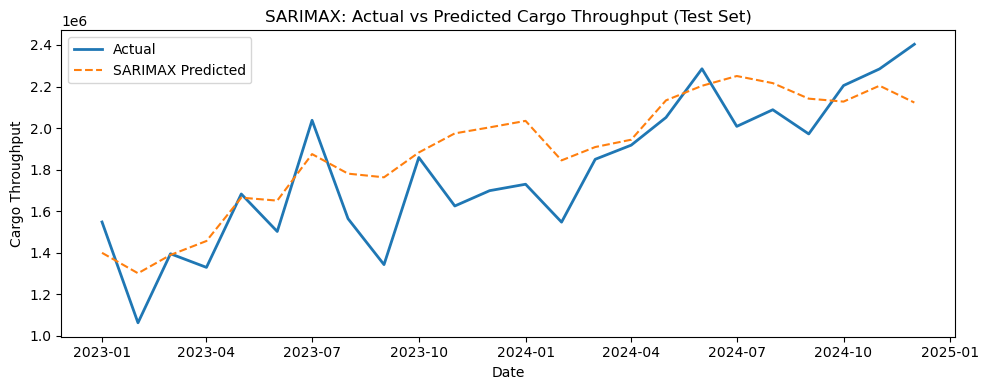

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(y_test.index, y_test.values, label="Actual", linewidth=2)
plt.plot(y_test.index, y_pred.values, label="SARIMAX Predicted", linestyle="--")
plt.title("SARIMAX: Actual vs Predicted Cargo Throughput (Test Set)")
plt.xlabel("Date")
plt.ylabel("Cargo Throughput")
plt.legend()
plt.tight_layout()
plt.show()


In [48]:
df.tail()

,Cargo Traffic,Container Traffic,CPI,Exchange Rate(USD),Inflation,M2,Vessel Traffic,log_Cargo,Cargo_lag1,Cargo_lag3,Cargo_lag6
Date,,,,,,,,,,,
2024-08-01,2088359.0,150036.75,229.4,15.1037,20.4,214821110000,139,14.551889,2008340.0,2051240.0,1547535.0
2024-09-01,1971894.0,156101.25,235.8,15.5575,21.5,229253490000,136,14.494505,2088359.0,2285334.0,1849970.0
2024-10-01,2204795.0,150726.00,237.8,15.9889,22.1,238258110000,142,14.606145,1971894.0,2008340.0,1917943.0
2024-11-01,2284761.0,157147.00,243.9,15.9834,21.5,244128780000,149,14.641772,2204795.0,2088359.0,2051240.0
2024-12-01,2403418.0,151051.50,248.3,14.7805,23.8,247761960000,142,14.692402,2284761.0,1971894.0,2285334.0


In [49]:
import pandas as pd
import numpy as np

# Example unseen data (1 or more future months)
new_df = pd.DataFrame({
    "Container Traffic": [4000],
    "Vessel Traffic": [5],
    "CPI": [243.9],
    "Inflation": [21.5],
    "M2": [2150000],
    "Exchange Rate(USD)": [15.9834]
})


In [51]:
# Get last observed cargo values from training data
new_df["Cargo_lag1"] = df["Cargo Traffic"].iloc[-1]
new_df["Cargo_lag3"] = df["Cargo Traffic"].iloc[-3]
new_df["Cargo_lag6"] = df["Cargo Traffic"].iloc[-6]


In [52]:
new_scaled = scaler.transform(new_df)


In [53]:
rf_prediction = rflag.predict(new_scaled)


In [54]:
results = new_df.copy()
results["Predicted_Cargo_Traffic"] = rf_prediction

print(results)


   Container Traffic  Vessel Traffic    CPI  Inflation       M2  \
0               4000               5  243.9       21.5  2150000   

   Exchange Rate(USD)  Cargo_lag1  Cargo_lag3  Cargo_lag6  \
0             15.9834   2403418.0   2204795.0   2008340.0   

   Predicted_Cargo_Traffic  
0             1.290917e+06  
